# **KNN CLASSIFICATION**

## **Data Preprocessing**

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Splitting the dataset into the train and test sets

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Feature Scaling



In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Actual Model**

Training the KNN model on the train set

In [5]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Predicting a new result

In [6]:
classifier.predict(sc.transform([[30,87000]]))

array([0])

Predicting the test set results

In [7]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


Confusion Matrix and Accuracy

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[64  4]
 [ 3 29]]
0.93


Visualizing the train set results

<ipython-input-13-d3690c887b92>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colormap1(i), label = j)


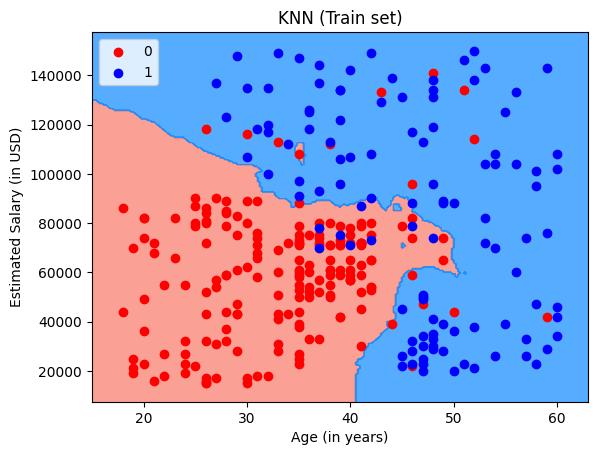

In [13]:
from matplotlib.colors import ListedColormap

h = .02
X0_min, X0_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
X1_min, X1_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
X0, X1 = np.meshgrid(np.arange(X0_min, X0_max, h), np.arange(X1_min, X1_max, h))
X0_unscaled, X1_unscaled = sc.inverse_transform(np.c_[X0.ravel(), X1.ravel()]).T.reshape(2, X0.shape[0], X0.shape[1])
colormap = ListedColormap(('salmon', 'dodgerblue'))
colormap1 = ListedColormap(('red', 'blue'))
plt.contourf(X0_unscaled, X1_unscaled, classifier.predict(np.c_[X0.ravel(), X1.ravel()]).reshape(X0.shape),alpha=0.75, cmap=colormap)
X_set, y_set = sc.inverse_transform(X_train), y_train
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colormap1(i), label = j)
xLower, xUpper = min(X_set[:, 0]), max(X_set[:, 0])
yLower, yUpper = min(X_set[:, 1]), max(X_set[:, 1])
xMargin, yMargin = xUpper * 0.05, yUpper * 0.05
plt.xlim(xLower - xMargin, xUpper + xMargin)
plt.ylim(yLower - yMargin, yUpper + yMargin)
plt.title("KNN (Train set)")
plt.xlabel("Age (in years)")
plt.ylabel("Estimated Salary (in USD)")
plt.legend()
plt.show()

Visualizing the test set results

<ipython-input-15-2c4fc78d6fe6>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colormap1(i), label = j)


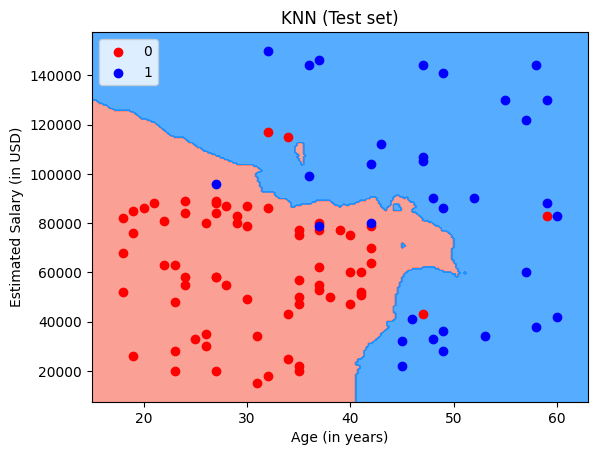

In [15]:
from matplotlib.colors import ListedColormap

h = .02
X0_min, X0_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
X1_min, X1_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
X0, X1 = np.meshgrid(np.arange(X0_min, X0_max, h), np.arange(X1_min, X1_max, h))
X0_unscaled, X1_unscaled = sc.inverse_transform(np.c_[X0.ravel(), X1.ravel()]).T.reshape(2, X0.shape[0], X0.shape[1])
colormap = ListedColormap(('salmon', 'dodgerblue'))
colormap1 = ListedColormap(('red', 'blue'))
plt.contourf(X0_unscaled, X1_unscaled, classifier.predict(np.c_[X0.ravel(), X1.ravel()]).reshape(X0.shape),alpha=0.75, cmap=colormap)
X_set, y_set = sc.inverse_transform(X_test), y_test
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colormap1(i), label = j)
xLower, xUpper = min(X_set[:, 0]), max(X_set[:, 0])
yLower, yUpper = min(X_set[:, 1]), max(X_set[:, 1])
xMargin, yMargin = xUpper * 0.05, yUpper * 0.05
plt.xlim(xLower - xMargin, xUpper + xMargin)
plt.ylim(yLower - yMargin, yUpper + yMargin)
plt.title("KNN (Test set)")
plt.xlabel("Age (in years)")
plt.ylabel("Estimated Salary (in USD)")
plt.legend()
plt.show()